# Exploratory Data Analysis 

In [6]:
import polars as pl

import plotly.express as px
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Path needs to be added manually to read from another folder
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import visualization

In [7]:
df = pl.read_csv("..\data\cleaned_df.csv")
print("Shape : ", df.shape)
df.head(5)

Shape :  (1695, 13)


,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,target
i64,str,f64,f64,f64,i64,str,f64,f64,f64,str,str,i64
0,"""1f2c32d8-2d6e-…",0.000812,0.004066,85.643243,5405,"""default""",1460.0,1295.0,451.0,"""E""","""normal""",0
1,"""4c486414-d4f5-…",0.000063,0.002211,16.166805,519,"""default""",9299.0,8447.0,302.0,"""E""","""normal""",0
2,"""7e5838fc-bce1-…",0.004481,0.015324,99.573276,6211,"""default""",255.0,232.0,354.0,"""E""","""normal""",0
3,"""82661ecd-d87f-…",0.017837,0.014974,69.792793,8292,"""default""",195.0,111.0,116.0,"""E""","""normal""",0
4,"""d62d56ea-775e-…",0.000797,0.006056,14.952756,182,"""default""",272.0,254.0,23.0,"""E""","""normal""",0


In [8]:
visualization.bar_plot(df,"target","Counts of Target Classes")

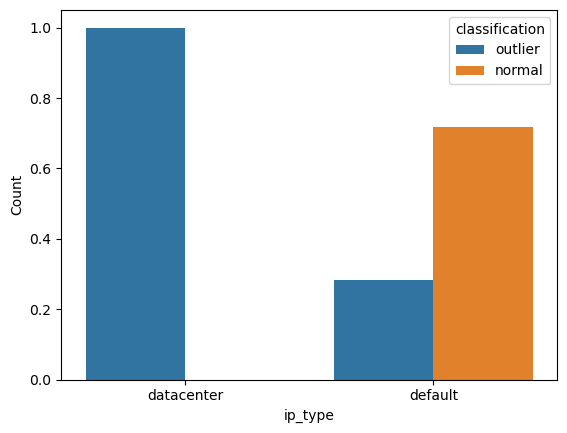

In [9]:
visualization.plt_proportion_plot(
    df,
    "ip_type",
    "classification",
    "Counts of Target Classes")


**Observation**
* Every API call from datacenter is an outlier


**Impact** 

* Every API call from datacenter can be dropped.